# Introduction to Neural Networks

Neural Network course from: https://www.youtube.com/watch?v=qMp3s7D_8Xw&list=PLemsnf33Vij4eFWwtoQCrt9AHjLe3uo9_&ab_channel=FlorianMarquardt. 
<br>
Oficial Web Page: https://pad.gwdg.de/s/Machine_Learning_For_Physicists_2021

### Basic struture of Neural Networks

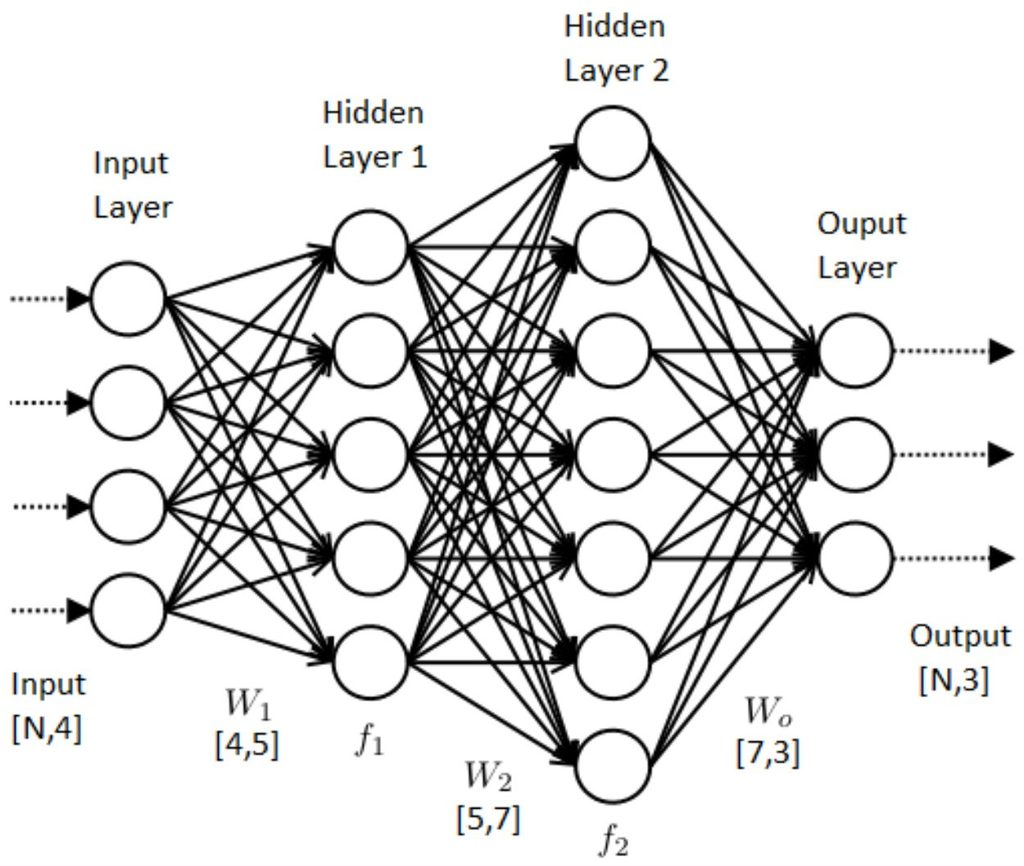

* One neuron in a layer takes the values of the neurons in the previous layer and calculates a new value that serves as an input for other layer or an output.
<br>
* **Input Layer**: First layer of the network that receives $y_i$ inputs.
<br>
The ouput of a neuron is a linear function of weighted ($\omega_n$) sums of inputs given by

$$z_j = \sum_{k} \omega_{jk}y_{k}^{in} + b_{j}$$
<br>
* $\omega_{j}:$ Weight value. $y_{j}:$input value. $b:$offset/bias
<br>
* This result is used to feed a nonlinear function $f_n(z)$ which is asigned to a neuron. Each neuron contains a function $f_n(z)$ and can be different nonlinear function for different hidden layers. $y_{j}^{out}=f_{n}(z)$
<br>
* **Feedforward:** pass through the network for output to input. 

## Manual Neural Network

In [1]:
from numpy import * 
import matplotlib.pyplot as plt

In [2]:
n0 = 3                                            #Size of input layer
n1 = 2                                            #Size of output layer 

w = random.uniform(low=-1, high=+1, size=(n1,n0)) #Weight matrix of size (n1,n0)
b = random.uniform(low=-1, high=+1, size=n1)      #Offset vector

In [3]:
y_in = array([0.3,-0.2,0.5])                      #Input values

In [4]:
z = dot(w,y_in) + b                               #Linear function
y_out = 1/(1+exp(-z))                             #Sigmoid function

In [5]:
print(f"y_in: {y_in}")
print(f"w: {w}")
print(f"b: {b}")
print(f"z: {z}")
print(f"y_out: {y_out}")

y_in: [ 0.3 -0.2  0.5]
w: [[ 0.27653716 -0.24520899 -0.07142593]
 [-0.65555448 -0.77729945  0.83039168]]
b: [ 0.01245734 -0.1125459 ]
z: [0.10874732 0.26144349]
y_out: [0.52716007 0.5649911 ]


* The linear function $z$ represents a plane that intersects the $y_{in}$ space. When $z<0$, positive vales of the plane lies above $y_{in}$.
<br>
* When evaluated in $f_{n}(z)$, for example a reLU, the negative values of z (below the $y_{in}$ plane) are zero and only $z>0$ are relevant.

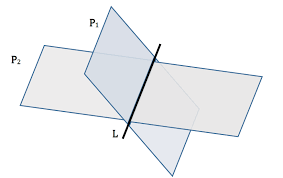

## Visualization of a Network result

In [6]:
def neuron(y_in):
    global w, b
    
    z = dot(w,y_in) + b
    return 1/(1+exp(-z))

In [7]:
n0 = 2                                            #Size of input layer
n1 = 1                                            #Size of output layer 

w = random.uniform(low=-1, high=+1, size=(n1,n0)) #Weight matrix of size (n1,n0)
b = random.uniform(low=-1, high=+1, size=n1)      #Offset vector

In [8]:
f = neuron([0.8,0.3])

In [9]:
%matplotlib notebook

M = 50 #Image size MxM
y_out = zeros([M,M])

for j1 in range(M):
    for j2 in range(M):
        value0 = float(j1)/M - 0.5
        value1 = float(j2)/M - 0.5
        y_out[j1,j2] = neuron([value0,value1])[0]

<IPython.core.display.Javascript object>


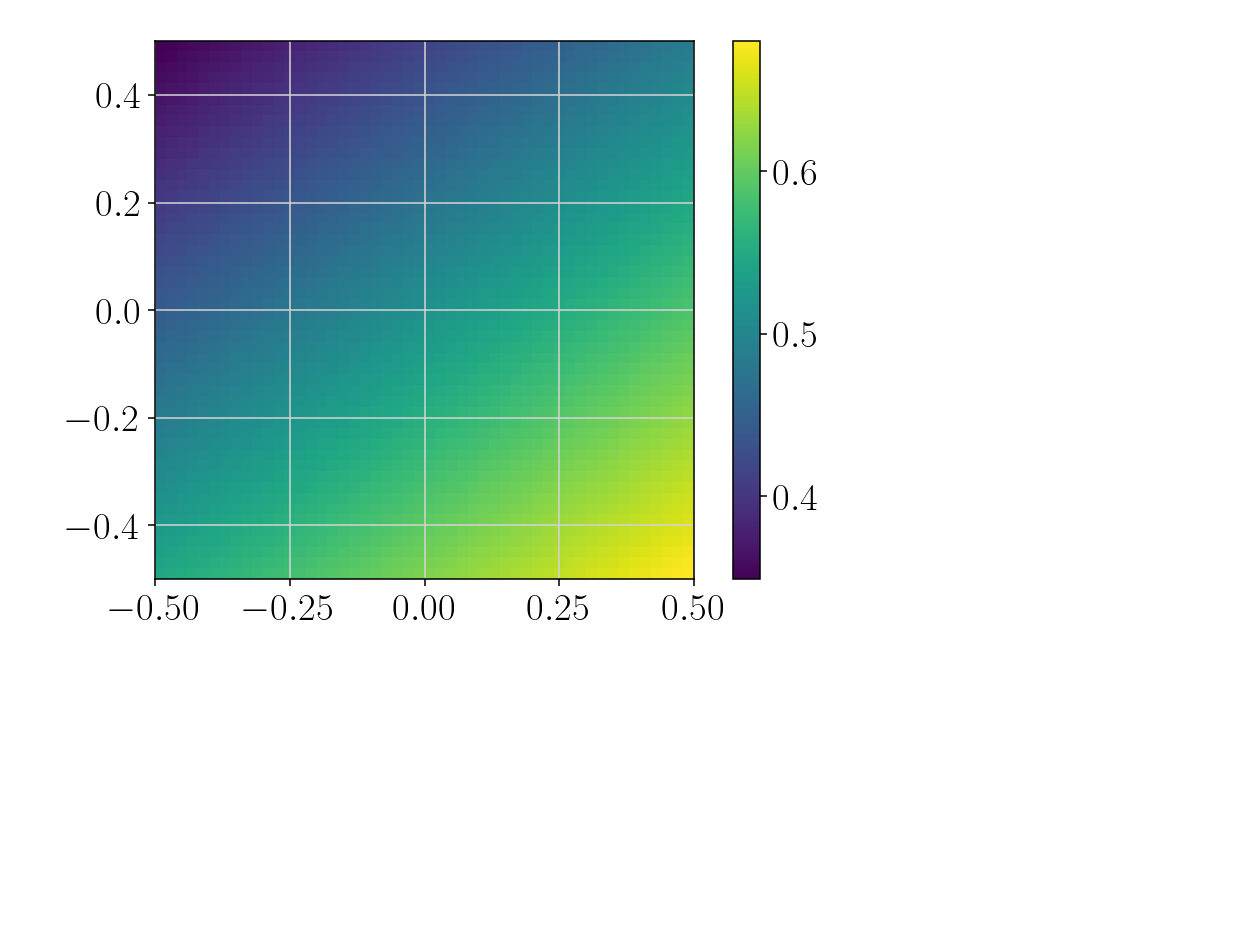

In [10]:
plt.imshow(y_out, origin="lower", extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

## Multi-layer Neural Network

In [11]:
def multiple_neuron(y_in,w,b):
    z = dot(w,y_in) + b
    return 1/(1+exp(-z))

In [13]:
def full_nn(y_in):
    global w1,w2,b1,b2
    
    y1 = multiple_neuron(y_in, w1, b1)
    y2 = multiple_neuron(y1, w2, b2)
    return y2

In [22]:
n0 = 2                                            #Size of input layer
nh = 30                                           #Size hidden layer
n1 = 1                                            #Size of output layer 

w1 = random.uniform(low=-1, high=+1, size=(nh,n0)) #Weight matrix of size (n1,n0)
b1 = random.uniform(low=-1, high=+1, size=nh)      #Offset vector

w2 = random.uniform(low=-1, high=+1, size=(n1,nh)) #Weight matrix of size (n1,n0)
b2 = random.uniform(low=-1, high=+1, size=n1)      #Offset vector

In [23]:
%matplotlib notebook

M = 50 #Image size MxM
y_out = zeros([M,M])

for j1 in range(M):
    for j2 in range(M):
        value0 = float(j1)/M - 0.5
        value1 = float(j2)/M - 0.5
        y_out[j1,j2] = full_nn([value0,value1])[0]

<IPython.core.display.Javascript object>


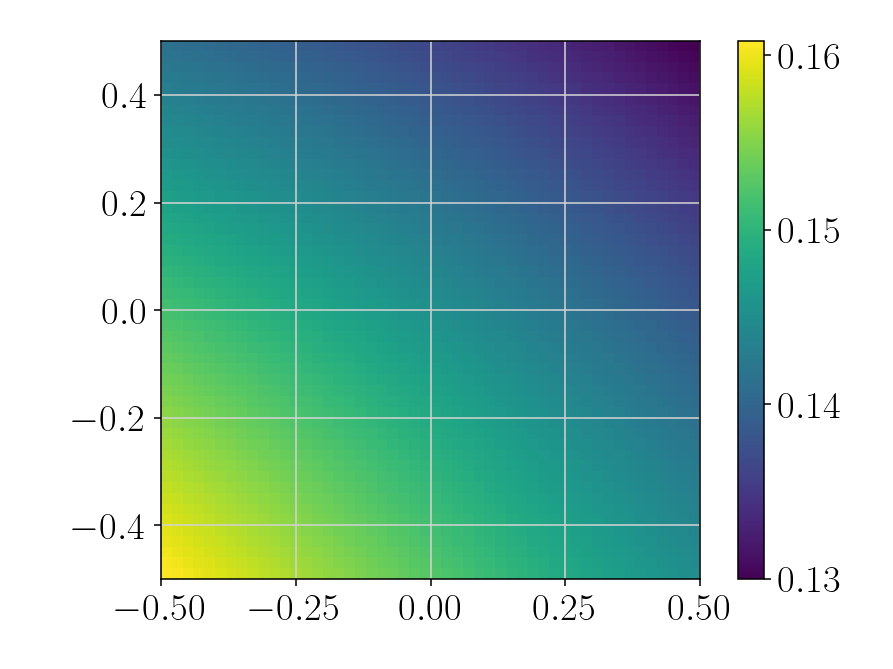

In [24]:
plt.imshow(y_out, origin="lower", extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

## Comple Network with many Hidden Layers